In [1]:
import utils
import keras
import model01
import datasets
import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [10]:
def plot_learning_curve(pc, model_desc, ylims):
    fig = plt.figure()
    plt.plot(pc.train_losses[:], label='training set')
    plt.plot(pc.validation_losses[:], label='validation set')
    ax= fig.axes[0]
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel('epoch')
    ax.set_ylabel('binary cross-entropy loss')
    plt.title('training curve - ' + model_desc)
    plt.legend()
    
def model_name_from_weights_file(wf):
    return "-".join(wf[9:-5].split('-')[:-2])


def report_performance(model_details, X_test, Y_test, prices_test, dataset_name, 
                       learning_curve=False, ylims=(0.68,0.70), **kwargs):
    
    name, weight_file = model_details
    title = name + " " + dataset_name  
    weight_file = './output/' + weight_file
    model = keras.models.load_model(weight_file)
    
    
    Y_test_pred = model.predict(X_test.as_matrix(), batch_size=1024)

    metrics_map = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, **kwargs)
    metrics_map['model'] = name
    if learning_curve:
        pc = model01.ProgressCallback.load(model_name_from_weights_file(weight_file))
        plot_learning_curve(pc, name, ylims)
        
    return model, metrics_map
    

In [25]:
!ls ./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-7*

./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-700-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-705-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-710-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-715-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-720-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-725-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-730-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-735-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-740-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-745-0.6914.hdf5
./output/MLPModel01_20170423_2154_EURUSD

In [12]:
BEST_MODELS = [
    ['100 dropout=0', 'MLPModel01_20170423_1307_EURUSD_DS3_20092014_LA1_F99_C2_L100_DO0-1000-0.6945.hdf5'],
    ['100x100 dropout=0','MLPModel01_20170423_1448_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_DO0-1000-0.6928.hdf5'],
    ['100x100 dropout=0.5','MLPModel01_20170425_1049_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_DO0.5-1000-0.6919.hdf5'],
    ['500 dropout=0','MLPModel01_20170423_1615_EURUSD_DS3_20092014_LA1_F99_C2_L500_DO0-1000-0.6949.hdf5'],
    ['500x500 dropout=0 epoch 165', 'MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-165-0.6954.hdf5'],
    ['500x500 dropout=0 epoch 1000', 'MLPModel01_20170423_1800_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0-1000-0.7095.hdf5'],
    ['500x500 dropout=0.5','MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-1000-0.6914.hdf5'],
    ['500x500 dropout=0.5 #2','MLPModel01_20170425_2130_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-1000-0.6910.hdf5'],
    ['100x100x100 dropout=0 epoch 20',  'MLPModel01_20170418_1912_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0-020-0.6932.hdf5'],
    ['100x100x100 dropout=0 epoch 115', 'MLPModel01_20170418_1912_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0-115-0.6934.hdf5'],
    ['100x100x100 dropout=0.5', 'MLPModel01_20170418_1151_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0.5-1005-0.6913.hdf5'],
    ['100x100x100 dropout=0.5 #2', 'MLPModel01_20170425_1447_EURUSD_DS3_20092014_LA1_F99_C2_L100_100_100_DO0.5-1000-0.6920.hdf5'],
    ['500x500x500 dropout=0',   'MLPModel01_20170423_1051_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0-015-0.6941.hdf5'],
    ['500x500x500 dropout=0.5 epoch 1470', 'MLPModel01_20170424_0713_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0.5-1470-0.6912.hdf5'],
    ['500x500x500 dropout=0.5 epoch 1970', 'MLPModel01_20170424_0713_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0.5-1970-0.6912.hdf5'],
    ['500x500x500 dropout=0.5', 'MLPModel01_20170424_0713_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_500_DO0.5-2000-0.6913.hdf5'],
    ['32x32x32x32 dropout=0.5 epoch 455', 'MLPModel01_20170423_1239_EURUSD_DS3_20092014_LA1_F99_C2_L32_32_32_32_DO0.5-455-0.6931.hdf5'],
]

In [19]:
# load validation dataset
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'

year=2015
test_title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

500x500 dropout=0.5 EURUSD 2015: f1-score: 0.526, mean future return: 0.030 bps, annualized future return 2.123


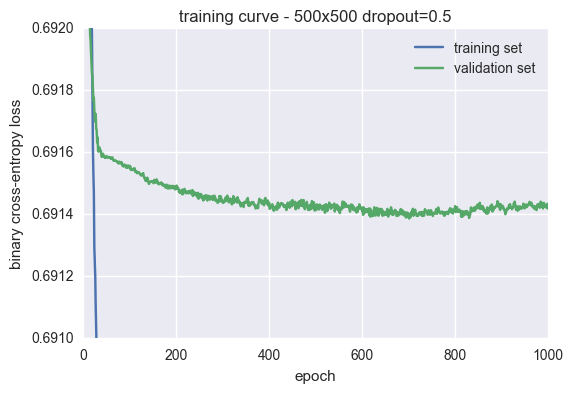

In [31]:
best = ['500x500 dropout=0.5','MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-1000-0.6914.hdf5']
report_performance(best, X_test, Y_test, prices_test, test_title, ylims=(0.691,0.692), learning_curve=True);

In [14]:
summary = pd.DataFrame()
model_indices = range(len(BEST_MODELS))
for i in model_indices:
    print 
    model, m = report_performance(BEST_MODELS[i], X_test, Y_test, prices_test, test_title, learning_curve=False)
    summary = summary.append(pd.Series(m), ignore_index=True)

summary['f1_score'] = summary['f1_score'].map('{:,.3f}'.format)
summary['mean_fut_return'] = summary['mean_fut_return'].map('{:,.3f}'.format)
summary['ann_fut_return'] = summary['ann_fut_return'].map('{:,.3f}'.format)
summary[['model', 'f1_score', 'mean_fut_return', 'ann_fut_return']]


100 dropout=0 EURUSD 2015: f1-score: 0.516, mean future return: 0.021 bps, annualized future return 1.221

100x100 dropout=0 EURUSD 2015: f1-score: 0.520, mean future return: 0.023 bps, annualized future return 1.329

100x100 dropout=0.5 EURUSD 2015: f1-score: 0.520, mean future return: 0.029 bps, annualized future return 1.948

500 dropout=0 EURUSD 2015: f1-score: 0.518, mean future return: 0.021 bps, annualized future return 1.207

500x500 dropout=0 epoch 165 EURUSD 2015: f1-score: 0.518, mean future return: 0.023 bps, annualized future return 1.380

500x500 dropout=0 epoch 1000 EURUSD 2015: f1-score: 0.516, mean future return: 0.025 bps, annualized future return 1.574

500x500 dropout=0.5 EURUSD 2015: f1-score: 0.526, mean future return: 0.030 bps, annualized future return 2.123

500x500 dropout=0.5 #2 EURUSD 2015: f1-score: 0.525, mean future return: 0.030 bps, annualized future return 2.080

100x100x100 dropout=0 epoch 20 EURUSD 2015: f1-score: 0.519, mean future return: 0.024 bp

,model,f1_score,mean_fut_return,ann_fut_return
0,100 dropout=0,0.516,0.021,1.221
1,100x100 dropout=0,0.520,0.023,1.329
2,100x100 dropout=0.5,0.520,0.029,1.948
3,500 dropout=0,0.518,0.021,1.207
4,500x500 dropout=0 epoch 165,0.518,0.023,1.380
5,500x500 dropout=0 epoch 1000,0.516,0.025,1.574
6,500x500 dropout=0.5,0.526,0.030,2.123
7,500x500 dropout=0.5 #2,0.525,0.030,2.080
8,100x100x100 dropout=0 epoch 20,0.519,0.024,1.472
9,100x100x100 dropout=0 epoch 115,0.521,0.026,1.653


----------------

In [15]:
# load *training* set
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'

year=20092014
train_title = sym + " " + str(year)
X_train, Y_train, prices_train = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

In [17]:
summary = pd.DataFrame()
model_indices = range(len(BEST_MODELS))
for i in model_indices:
    print 
    model, m = report_performance(BEST_MODELS[i], X_train, Y_train, prices_train, train_title, learning_curve=False)
    summary = summary.append(pd.Series(m), ignore_index=True)

summary['f1_score'] = summary['f1_score'].map('{:,.3f}'.format)
summary['mean_fut_return'] = summary['mean_fut_return'].map('{:,.3f}'.format)
summary['ann_fut_return'] = summary['ann_fut_return'].map('{:,.3f}'.format)
summary[['model', 'f1_score', 'mean_fut_return', 'ann_fut_return']]


100 dropout=0 EURUSD 20092014: f1-score: 0.533, mean future return: 0.042 bps, annualized future return 3.784

100x100 dropout=0 EURUSD 20092014: f1-score: 0.542, mean future return: 0.057 bps, annualized future return 7.470

100x100 dropout=0.5 EURUSD 20092014: f1-score: 0.530, mean future return: 0.029 bps, annualized future return 1.988

500 dropout=0 EURUSD 20092014: f1-score: 0.547, mean future return: 0.073 bps, annualized future return 14.314

500x500 dropout=0 epoch 165 EURUSD 20092014: f1-score: 0.550, mean future return: 0.085 bps, annualized future return 23.519

500x500 dropout=0 epoch 1000 EURUSD 20092014: f1-score: 0.599, mean future return: 0.217 bps, annualized future return 3342.891

500x500 dropout=0.5 EURUSD 20092014: f1-score: 0.546, mean future return: 0.050 bps, annualized future return 5.575

500x500 dropout=0.5 #2 EURUSD 20092014: f1-score: 0.546, mean future return: 0.052 bps, annualized future return 5.965

100x100x100 dropout=0 epoch 20 EURUSD 20092014: f1-s

,model,f1_score,mean_fut_return,ann_fut_return
0,100 dropout=0,0.533,0.042,3.784
1,100x100 dropout=0,0.542,0.057,7.470
2,100x100 dropout=0.5,0.530,0.029,1.988
3,500 dropout=0,0.547,0.073,14.314
4,500x500 dropout=0 epoch 165,0.550,0.085,23.519
5,500x500 dropout=0 epoch 1000,0.599,0.217,"3,342.891"
6,500x500 dropout=0.5,0.546,0.050,5.575
7,500x500 dropout=0.5 #2,0.546,0.052,5.965
8,100x100x100 dropout=0 epoch 20,0.541,0.052,6.003
9,100x100x100 dropout=0 epoch 115,0.545,0.062,9.057


---

In [18]:
from sklearn.externals import joblib
gnb_model = joblib.load('./output/gnb_EURUSD_DS3_20092014.pkl') 

Y_test_pred = gnb_model.predict(X_test.as_matrix())
metrics.performance_report("gnb",  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, histogram=False, heatmap=False)

Y_train_pred = gnb_model.predict(X_train.as_matrix())
metrics.performance_report("gnb",  prices_train,  lookahead, Y_train, Y_train_pred, cum_return_plot=False, histogram=False, heatmap=False)

gnb: f1-score: 0.514, mean future return: 0.021 bps, annualized future return 1.216
gnb: f1-score: 0.522, mean future return: 0.022 bps, annualized future return 1.281


{'ann_fut_return': 1.2808569982297051,
 'f1_score': 0.52239711689831758,
 'mean_fut_return': 0.022023353608554893,
 'name': 'gnb'}

-----------------------------------------


In [ ]:
!! Idea: assess performance of 1 minute prediction over next n periods, e.g. by average signal, ewma signal.
    Versus predicting on n periods ahead directly.
    
    Increase N to point of being potentially tradeable.
    
    

In [ ]:
i_s = []
frsma = []
frewma = []
for i in range(20):
    i_s.append(i)
    fut_ret_sma = metrics.aggregated_predicted_future_return(
        prices=prices_test, prediction=Y_test_pred, agg_period=i, mode='sma').mean() *1e4
    frsma.append(fut_ret_sma)
    
    fut_ret_ewma = metrics.aggregated_predicted_future_return(
        prices=prices_test, prediction=Y_test_pred, agg_period=i, mode='ewm').mean() *1e4
    frewma.append(fut_ret_ewma)

plt.plot(i_s, frsma,'.-')
plt.plot(i_s, frewma,'.-')
    

??? why are perf charts below different to fut return charts from performance report.????

In [ ]:
fut_return_test = utils.future_return(prices_test, 1)

In [ ]:
def perf(Y, fut_ret):
    preds = Y[:,0]
    rets = fut_ret.fillna(0).values
    assert preds.shape == rets.shape
    
    cats = utils.prediction_to_category2(preds)
    # turn true/false into +1/-1
    signs = cats*2 -1 
    
    applied_rets = signs*rets / signs.std()
    ser =  pd.Series(applied_rets, index=fut_ret.index)   
    print ser.mean()/ser.std()
    return ser

In [ ]:
def perf2(Y, fut_ret):
    preds = Y[:,0]
    rets = fut_ret.fillna(0).values
    assert preds.shape == rets.shape
    
    # turn true/false into +1/-1
    signs = preds - 0.5
    
    applied_rets = signs*rets / signs.std()
    ser =  pd.Series(applied_rets, index=fut_ret.index)   
    print ser.mean()/ser.std()
    return ser

In [ ]:
def perf3(Y, fut_ret):
    preds = Y[:,0]
    rets = fut_ret.fillna(0).values
    assert preds.shape == rets.shape
    
    # turn true/false into +1/-1
    signs = (preds - 0.5)
    signs = np.tanh(signs/2)
    applied_rets = signs*rets / signs.std()
    ser =  pd.Series(applied_rets, index=fut_ret.index)   
    print ser.mean()/ser.std()
    return ser

In [ ]:
print perf(Y_test_pred, fut_return_test).sum()
print perf2(Y_test_pred, fut_return_test).sum()
print perf3(Y_test_pred, fut_return_test).sum()

In [ ]:
perf(Y_test_pred, fut_return_test).cumsum().plot(label='perf')
perf2(Y_test_pred, fut_return_test).cumsum().plot(label='perf2')
perf3(Y_test_pred, fut_return_test).cumsum().plot(label='perf3')
plt.legend()

-----------------------------------

## Control

In [36]:
X_control, Y_control, prices_control = datasets.prepare_dataset3(df=datasets.random_ohlc(300000),lookahead=1, n_periods=25)

In [37]:
X_test.describe()

,open-0,high-0,low-0,open-1,high-1,low-1,close-1,open-2,high-2,low-2,...,low-328,close-328,open-365,high-365,low-365,close-365,open-404,high-404,low-404,close-404
count,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,...,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000,343652.000000
mean,0.000399,0.011358,-0.010195,0.000398,0.011416,-0.010254,0.000315,0.000391,0.011468,-0.010307,...,-0.000683,-0.000037,-0.000232,-0.002583,0.002729,-0.001075,-0.000385,-0.007237,0.007205,-0.002133
std,1.008308,1.004710,1.000925,1.008347,1.004728,1.000918,1.006027,1.008364,1.004719,1.000898,...,0.995091,1.011594,0.997570,0.997073,0.993832,1.011717,0.993216,0.994268,0.990081,1.011687
min,-36.891592,-0.886780,-52.472297,-36.891592,-0.886780,-52.472297,-40.789232,-36.891592,-0.886780,-52.472297,...,-52.472297,-11.568464,-36.891592,-0.883552,-52.472297,-11.025217,-36.891592,-0.883552,-52.472297,-10.576138
25%,-0.416279,-0.628750,-0.296046,-0.416311,-0.628698,-0.296154,-0.416409,-0.416434,-0.628641,-0.296178,...,-0.279305,-0.541445,-0.406763,-0.633137,-0.273774,-0.548299,-0.404288,-0.634699,-0.268112,-0.553305
50%,-0.003977,-0.287537,0.280165,-0.003977,-0.287462,0.280081,-0.001038,-0.003980,-0.287373,0.279997,...,0.290112,-0.013298,-0.003980,-0.301454,0.293459,-0.016360,-0.003967,-0.305693,0.296893,-0.012193
75%,0.416448,0.303166,0.621840,0.416480,0.303187,0.621727,0.416107,0.416509,0.303207,0.621647,...,0.625236,0.530590,0.407517,0.280152,0.626537,0.537193,0.404810,0.273610,0.627917,0.544844
max,42.420719,48.819422,0.866133,42.420719,48.819422,0.866133,51.144149,42.420719,48.819422,0.866133,...,0.866133,6.797205,42.420719,48.819422,0.866133,6.636036,42.420719,48.819422,0.866133,6.347357


In [38]:
X_control.describe()

,open-0,high-0,low-0,open-1,high-1,low-1,close-1,open-2,high-2,low-2,...,low-328,close-328,open-365,high-365,low-365,close-365,open-404,high-404,low-404,close-404
count,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,...,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000,291518.000000
mean,0.000225,0.000023,0.000361,0.000232,0.000029,0.000365,0.000384,0.000237,0.000034,0.000374,...,0.000333,0.007396,0.000198,0.000010,0.000315,0.007999,0.000177,-0.000007,0.000276,0.008605
std,0.999720,0.999670,0.999458,0.999721,0.999669,0.999459,0.999744,0.999720,0.999668,0.999457,...,0.999486,1.011988,0.999645,0.999634,0.999472,1.013692,0.999659,0.999635,0.999489,1.015745
min,-4.703040,-0.991467,-6.899866,-4.703040,-0.991467,-6.899866,-4.846526,-4.703040,-0.991467,-6.899866,...,-6.899866,-3.839197,-4.703040,-0.991467,-6.899866,-3.866195,-4.703040,-0.991467,-6.899866,-3.858923
25%,-0.673469,-0.944929,-0.575095,-0.673460,-0.944929,-0.575095,-0.672893,-0.673452,-0.944928,-0.575079,...,-0.575166,-0.703055,-0.673452,-0.944929,-0.575197,-0.705032,-0.673501,-0.944928,-0.575248,-0.710452
50%,0.003012,-0.252873,0.250115,0.003016,-0.252852,0.250126,0.001828,0.003025,-0.252844,0.250126,...,0.250115,0.020250,0.002928,-0.252844,0.250082,0.019212,0.002854,-0.252927,0.250055,0.026723
75%,0.672481,0.573697,0.947536,0.672494,0.573706,0.947536,0.673271,0.672501,0.573706,0.947538,...,0.947501,0.709026,0.672452,0.573671,0.947481,0.700404,0.672365,0.573596,0.947450,0.695327
max,4.435874,6.505442,0.994154,4.435874,6.505442,0.994154,4.584615,4.435874,6.505442,0.994154,...,0.994154,3.598919,4.435874,6.505442,0.994154,3.634057,4.435874,6.505442,0.994154,3.895015


control: f1-score: 0.500, mean future return: -0.000 bps, annualized future return -0.010


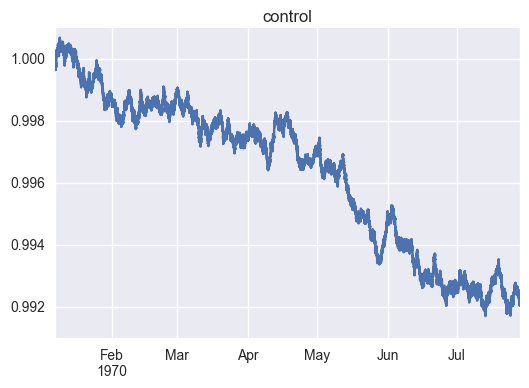

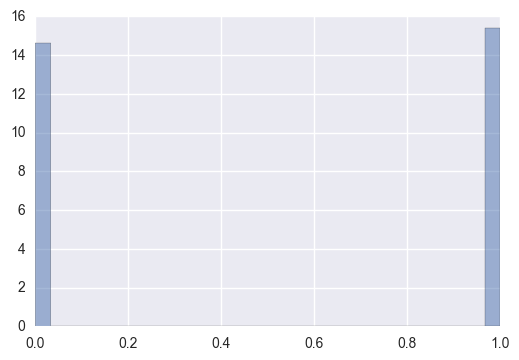

[[71131 74816]
 [70935 74636]]


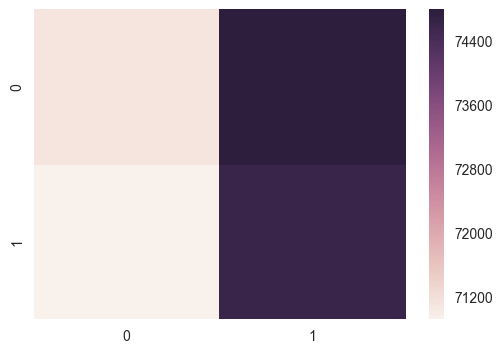

In [39]:
Y_control_pred = model.predict(X_control.as_matrix(), batch_size=1024)
Y_control_pred_class = utils.prediction_to_category2(Y_control_pred)
metrics.performance_report("control",  prices_control,  lookahead, Y_control, Y_control_pred_class, cum_return_plot=True, heatmap=True, histogram=True)

In [ ]:
(fut_return_control.ix[~Y_control_pred_class[:,0]]+1).mean() - fut_return_control.mean() - 1